<a href="https://colab.research.google.com/github/glenmiracle18/Machine_Learning_Summative-Glen-Miracle-/blob/main/Bonyu_Miracle_Glen_Summative_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization Using Gradient Descent: Linear Regression

In this assignment, you will build a simple linear regression model to predict sales based on TV marketing expenses. You will investigate three different approaches to this problem. You will use `NumPy` and `Scikit-Learn` linear regression models, as well as construct and optimize the sum of squares cost function with gradient descent from scratch.

Further you will add additional cells to compare Linear regression and atleast 1 other algorithm

# Table of Contents

- [ 1 - Open the Dataset and State the Problem]
  - [ Exercise 1]
- [ 2 - Linear Regression in Python with `NumPy` and `Scikit-Learn`]
  - [ 2.1 - Linear Regression with `NumPy`]
    - [ Exercise 2]
  - [ 2.2 - Linear Regression with `Scikit-Learn`]
    - [ Exercise 3]
    - [ Exercise 4]
- [ 3 - Linear Regression using Gradient Descent]
  - [ Exercise 5]
  - [ Exercise 6]

## Packages

Load the required packages:

In [1]:
# For programmatic plot generation
import matplotlib.pyplot as plt

# For data manipulation and analysis
import pandas as pd
import numpy as np

# For Linear Regression from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Optional - for comparison with another algorithm
from sklearn.tree import DecisionTreeRegressor

Import the unit tests defined for this notebook.

In [2]:
import w2_unittest


<a name='1'></a>
## 1 - Open the Dataset and State the Problem

In this lab, you will build a linear regression model for a simple Kaggle dataset, saved in a file `data/tvmarketing.csv`. The dataset has only two fields: TV marketing expenses (`TV`) and sales amount (`Sales`).

<a name='ex01'></a>
### Exercise 1

Use `pandas` function `pd.read_csv` to open the .csv file the from the `path`.

In [3]:
path = "/content/tvmarketing.csv"

### START CODE HERE ### (~ 1 line of code)
adv = pd.read_csv(path)
### END CODE HERE ###

In [4]:
# Print some part of the dataset.
adv.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


##### __Expected Output__

```Python
	TV	Sales
0	230.1	22.1
1	44.5	10.4
2	17.2	9.3
3	151.5	18.5
4	180.8	12.9
```

In [5]:
w2_unittest.test_load_data(adv)

 All tests passed


`pandas` has a function to make plots from the DataFrame fields. By default, matplotlib is used at the backend. Let's use it here:

<Axes: xlabel='TV', ylabel='Sales'>

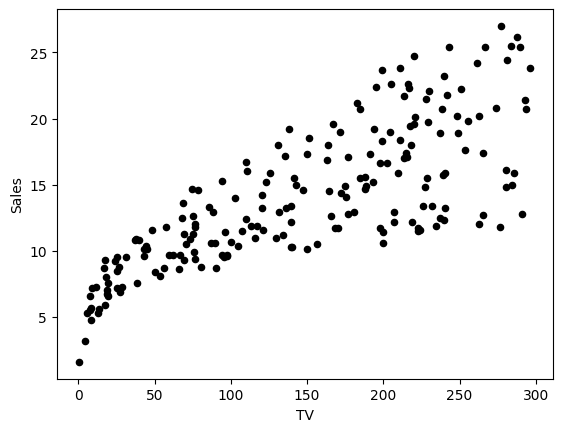

In [6]:
adv.plot(x='TV', y='Sales', kind='scatter', c='black')

You can use this dataset to solve a simple problem with linear regression: given a TV marketing budget, predict sales.

<a name='2'></a>
## 2 - Linear Regression in Python with `NumPy` and `Scikit-Learn`

Save the required field of the DataFrame into variables `X` and `Y`:

In [8]:
X = adv['TV'].values.reshape(-1, 1)  # sklearn requires a 2D array
Y = adv['Sales'].values

<a name='2.1'></a>
### 2.1 - Linear Regression with `NumPy`

You can use the function `np.polyfit(x, y, deg)` to fit a polynomial of degree `deg` to points $(x, y)$, minimising the sum of squared errors. You can read more in the [documentation](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html). Taking `deg = 1` you can obtain the slope `m` and the intercept `b` of the linear regression line:

In [9]:
m_numpy, b_numpy = np.polyfit(X.flatten(), Y, deg=1)  # flatten X since polyfit expects 1D array

print(f"Linear regression with NumPy. Slope: {m_numpy}. Intercept: {b_numpy}")


Linear regression with NumPy. Slope: 0.04753664043301975. Intercept: 7.0325935491276965


*Note*: [`NumPy` documentation](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) suggests the [`Polynomial.fit` class method](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.Polynomial.fit.html#numpy.polynomial.polynomial.Polynomial.fit) as recommended for new code as it is more stable numerically. But in this simple example, you can stick to the `np.polyfit` function for simplicity.

<a name='ex02'></a>
### Exercise 2

Make predictions substituting the obtained slope and intercept coefficients into the equation $Y = mX + b$, given an array of $X$ values.

In [10]:
# This is organised as a function only for grading purposes.
def pred_numpy(m, b, X):

    # TO DO: Insert code here
    Y = m * X + b
    return Y

In [11]:
X_pred = np.array([50, 120, 280])
Y_pred_numpy = pred_numpy(m_numpy, b_numpy, X_pred)

print(f"TV marketing expenses:\n{X_pred}")
print(f"Predictions of sales using NumPy linear regression:\n{Y_pred_numpy}")

TV marketing expenses:
[ 50 120 280]
Predictions of sales using NumPy linear regression:
[ 9.40942557 12.7369904  20.34285287]


##### __Expected Output__

```Python
TV marketing expenses:
[ 50 120 280]
Predictions of sales using NumPy linear regression:
[ 9.40942557 12.7369904  20.34285287]
```

In [12]:
w2_unittest.test_pred_numpy(pred_numpy)

 All tests passed


<a name='2.2'></a>
### 2.2 - Linear Regression with `Scikit-Learn`

`Scikit-Learn` is an open-source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection, model evaluation, and many other utilities. `Scikit-learn` provides dozens of built-in machine learning algorithms and models, called **estimators**. Each estimator can be fitted to some data using its `fit` method. Full documentation can be found [here](https://scikit-learn.org/stable/).

Create an estimator object for a linear regression model:

In [13]:
lr_sklearn = LinearRegression()

The estimator can learn from data calling the `fit` function. However, trying to run the following code you will get an error, as the data needs to be reshaped into 2D array:

In [14]:
print(f"Shape of X array: {X.shape}")
print(f"Shape of Y array: {Y.shape}")

try:
    lr_sklearn.fit(X, Y)
except ValueError as err:
    print(err)

Shape of X array: (200, 1)
Shape of Y array: (200,)


You can increase the dimension of the array by one with `reshape` function, or there is another another way to do it:

In [15]:
X_sklearn = X[:, np.newaxis]
Y_sklearn = Y[:, np.newaxis]

print(f"Shape of new X array: {X_sklearn.shape}")
print(f"Shape of new Y array: {Y_sklearn.shape}")

Shape of new X array: (200, 1, 1)
Shape of new Y array: (200, 1)


You have already loaded your dataset into X_sklearn and Y_sklearn
Step 1: Split the data into training and testing sets use train_test_split from sklearn
The test size shoukd be 20% of the data

In [16]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



Step 2: Fit the linear regression model to the training data


In [17]:
lr_sklearn.fit(X_train, Y_train) #Insert proper arguments fro training asper step 1

LinearRegression()


 Step 3: Make predictions using the fitted model on the testing data


In [18]:
Y_pred = lr_sklearn.predict(X_test)

 Step 4: Calculate the RMSE
Using sklearn.metrics - mean_squared_error

In [19]:
#Insert your code here
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print("Root Mean Square Error:", rmse)

Root Mean Square Error: 3.194472431998898


TO DO Create an estimator object for Random Forest and Desision Trees and compare RSMES:

In [22]:
# To do
#Print out the rank of models From the best to the worst performing and associated RSMEs

#Replace the code below with appropriatly
# Import required models
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Create estimator objects
lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)
dt_model = DecisionTreeRegressor(random_state=42)

models = {
   'Linear Regression': lr_model,
   'Random Forest': rf_model,
   'Decision Trees': dt_model
}

model_rmse = {}

# Train and evaluate each model
for name, model in models.items():
   # Train the model
   model.fit(X_train, Y_train)

   y_pred = model.predict(X_test)

   # Calculate RMSE
   rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
   model_rmse[name] = rmse

# Sort models by RMSE (ascending order - lower is better)
model_rank = dict(sorted(model_rmse.items(), key=lambda x: x[1]))



Model Rankings (Best to Worst):
----------------------------------------
1. Random Forest: RMSE = 3.0171
2. Linear Regression: RMSE = 3.1945
3. Decision Trees: RMSE = 3.4452


The estimator can learn from data calling the `fit` function for RandomForest and Decision Trees

Compare the RSME for the three different models and rank them according to performance i.e Print out Model Rank and Associated RSME

In [23]:
# Print rankings with RMSE scores
print("Model Rankings (Best to Worst):")
print("-" * 40)
for rank, (model_name, rmse) in enumerate(model_rank.items(), 1):
   print(f"{rank}. {model_name}: RMSE = {rmse:.4f}")


Model Rankings (Best to Worst):
----------------------------------------
1. Random Forest: RMSE = 3.0171
2. Linear Regression: RMSE = 3.1945
3. Decision Trees: RMSE = 3.4452


<a name='ex03'></a>
### Exercise 3

Fit the linear regression model passing `X_sklearn` and `Y_sklearn` arrays into the function `lr_sklearn.fit`.

In [25]:
### START CODE HERE ### (~ 1 line of code)
lr_sklearn.fit(X, Y)


# Make predictions on the full dataset
Y_pred_full = lr_sklearn.predict(X)

# Calculate RMSE
rmse_full = np.sqrt(mean_squared_error(Y, Y_pred_full))
r2_full = r2_score(Y, Y_pred_full)

print(f"\nModel Performance:")
print(f"RMSE: {rmse_full:.4f}")
print(f"R² Score: {r2_full:.4f}")


Model Performance:
RMSE: 3.2423
R² Score: 0.6119


In [26]:
m_sklearn = lr_sklearn.coef_
b_sklearn = lr_sklearn.intercept_

print(f"Linear regression using Scikit-Learn. Slope: {m_sklearn}. Intercept: {b_sklearn}")

Linear regression using Scikit-Learn. Slope: [0.04753664]. Intercept: 7.032593549127695


##### __Expected Output__

```Python
Linear regression using Scikit-Learn. Slope: [[0.04753664]]. Intercept: [7.03259355]
```

In [53]:
w2_unittest.test_sklearn_fit(lr_sklearn)

 All tests passed


Note that you have got the same result as with the `NumPy` function `polyfit`. Now, to make predictions it is convenient to use `Scikit-Learn` function `predict`.

<a name='ex04'></a>
### Exercise 4


Increase the dimension of the $X$ array using the function `np.newaxis` (see an example above) and pass the result to the `lr_sklearn.predict` function to make predictions.

In [31]:
def pred_sklearn(X, lr_sklearn):
    ### START CODE HERE ###
    X_2D = X[:, np.newaxis]  # Increase dimension to 2D array
    Y = lr_sklearn.predict(X_2D)  # Make predictions
    Y = Y[:, np.newaxis]  # Reshape Y to be (n, 1) instead of (n,)
    ### END CODE HERE ###
    return Y

In [32]:
Y_pred_sklearn = pred_sklearn(X_pred, lr_sklearn)

print(f"TV marketing expenses:\n{X_pred}")
print(f"Predictions of sales using Scikit_Learn linear regression:\n{Y_pred_sklearn.T}")

TV marketing expenses:
[ 50 120 280]
Predictions of sales using Scikit_Learn linear regression:
[[ 9.40942557 12.7369904  20.34285287]]


##### __Expected Output__

```Python
TV marketing expenses:
[ 50 120 280]
Predictions of sales using Scikit_Learn linear regression:
[[ 9.40942557 12.7369904  20.34285287]]
```

In [33]:
w2_unittest.test_sklearn_predict(pred_sklearn, lr_sklearn)

 All tests passed


You can plot the linear regression line and the predictions by running the following code. The regression line is red and the predicted points are blue.

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(8,5))
ax.plot(X, Y, 'o', color='black')
ax.set_xlabel('TV')
ax.set_ylabel('Sales')

ax.plot(X, m_sklearn[0][0]*X+b_sklearn[0], color='red')
ax.plot(X_pred, Y_pred_sklearn, 'o', color='blue')

<a name='3'></a>
## 3 - Linear Regression using Gradient Descent

Functions to fit the models automatically are convenient to use, but for an in-depth understanding of the model and the maths behind it is good to implement an algorithm by yourself. Let's try to find linear regression coefficients $m$ and $b$, by minimising the difference between original values $y^{(i)}$ and predicted values $\hat{y}^{(i)}$ with the **loss function** $L\left(w, b\right)  = \frac{1}{2}\left(\hat{y}^{(i)} - y^{(i)}\right)^2$ for each of the training examples. Division by $2$ is taken just for scaling purposes, you will see the reason below, calculating partial derivatives.

To compare the resulting vector of the predictions $\hat{Y}$ with the vector $Y$ of original values $y^{(i)}$, you can take an average of the loss function values for each of the training examples:

$$E\left(m, b\right) = \frac{1}{2n}\sum_{i=1}^{n} \left(\hat{y}^{(i)} - y^{(i)}\right)^2 =
\frac{1}{2n}\sum_{i=1}^{n} \left(mx^{(i)}+b - y^{(i)}\right)^2,\tag{1}$$

where $n$ is a number of data points. This function is called the sum of squares **cost function**. To use gradient descent algorithm, calculate partial derivatives as:

\begin{align}
\frac{\partial E }{ \partial m } &=
\frac{1}{n}\sum_{i=1}^{n} \left(mx^{(i)}+b - y^{(i)}\right)x^{(i)},\\
\frac{\partial E }{ \partial b } &=
\frac{1}{n}\sum_{i=1}^{n} \left(mx^{(i)}+b - y^{(i)}\right),
\tag{2}\end{align}

and update the parameters iteratively using the expressions

\begin{align}
m &= m - \alpha \frac{\partial E }{ \partial m },\\
b &= b - \alpha \frac{\partial E }{ \partial b },
\tag{3}\end{align}

where $\alpha$ is the learning rate.

Original arrays `X` and `Y` have different units. To make gradient descent algorithm efficient, you need to bring them to the same units. A common approach to it is called **normalization**: substract the mean value of the array from each of the elements in the array and divide them by standard deviation (a statistical measure of the amount of dispersion of a set of values). If you are not familiar with mean and standard deviation, do not worry about this for now - this is covered in the next Course of Specialization.

Normalization is not compulsory - gradient descent would work without it. But due to different units of `X` and `Y`, the cost function will be much steeper. Then you would need to take a significantly smaller learning rate $\alpha$, and the algorithm will require thousands of iterations to converge instead of a few dozens. Normalization helps to increase the efficiency of the gradient descent algorithm.

Normalization is implemented in the following code:

In [34]:
X_norm = (X - np.mean(X))/np.std(X)
Y_norm = (Y - np.mean(Y))/np.std(Y)

Define cost function according to the equation $(1)$:

In [35]:
def E(m, b, X, Y):
   Y_pred = m * X + b

   # Calculate squared differences and take mean
   cost = np.mean((Y_pred - Y) ** 2) / 2

   return cost

<a name='ex05'></a>
### Exercise 5


Define functions `dEdm` and `dEdb` to calculate partial derivatives according to the equations $(2)$. This can be done using vector form of the input data `X` and `Y`.

In [39]:
def dEdm(m, b, X, Y):
    ### START CODE HERE ###
    res = np.mean((m * X + b - Y) * X)  # This is the derivative of E with respect to m
    ### END CODE HERE ###
    return res

def dEdb(m, b, X, Y):
    ### START CODE HERE ###
    res = np.mean(m * X + b - Y)  # This is the derivative of E with respect to b
    ### END CODE HERE ###
    return res

In [40]:
print(dEdm(0, 0, X_norm, Y_norm))
print(dEdb(0, 0, X_norm, Y_norm))
print(dEdm(1, 5, X_norm, Y_norm))
print(dEdb(1, 5, X_norm, Y_norm))

7.438494264988549e-19
1.7283952047364437e-16
1.0000000000000007
5.0


##### __Expected Output__

```Python
-0.7822244248616067
5.098005351200641e-16
0.21777557513839355
5.000000000000002
```

In [41]:
w2_unittest.test_partial_derivatives(dEdm, dEdb, X_norm, Y_norm)

Test case "default_check". Wrong output of dEdm for m = 0, b = 0. 
	Expected: 
-0.7822244248616065
	Got: 
7.438494264988549e-19
Test case "extra_check". Wrong output of dEdm for m = 1, b = 5. 
	Expected: 
0.21777557513839416
	Got: 
1.0000000000000007
 2  Tests passed
 2  Tests failed


<a name='ex06'></a>
### Exercise 6


Implement gradient descent using expressions $(3)$:
\begin{align}
m &= m - \alpha \frac{\partial E }{ \partial m },\\
b &= b - \alpha \frac{\partial E }{ \partial b },
\end{align}

where $\alpha$ is the `learning_rate`.

In [42]:
def gradient_descent(dEdm, dEdb, m, b, X, Y, learning_rate=0.001, num_iterations=1000, print_cost=False):
   for iteration in range(num_iterations):
       ### START CODE HERE ###
       m_new = m - learning_rate * dEdm(m, b, X, Y)
       b_new = b - learning_rate * dEdb(m, b, X, Y)
       ### END CODE HERE ###
       m = m_new
       b = b_new
       if print_cost:
           print(f"Cost after iteration {iteration}: {E(m, b, X, Y)}")
   return m, b

In [43]:
print(gradient_descent(dEdm, dEdb, 0, 0, X_norm, Y_norm))
print(gradient_descent(dEdm, dEdb, 1, 5, X_norm, Y_norm, learning_rate = 0.01, num_iterations = 10))

(5.6674109849554e-20, -1.1701724034196633e-16)
(0.9043820750088044, 4.521910375044022)


##### __Expected Output__

```Python
(0.49460408269589495, -3.489285249624889e-16)
(0.9791767513915026, 4.521910375044022)
```

In [44]:
w2_unittest.test_gradient_descent(gradient_descent, dEdm, dEdb, X_norm, Y_norm)

Test case "default_check". Wrong output value m of the function gradient_descent.
m = 0, b = 0, learning_rate = 0.001, num_iterations = 1000. 
	Expected: 
0.49460408269589484
	Got: 
5.6674109849554e-20
Test case "extra_check". Wrong output value m of the function gradient_descent.
m = 1, b = 5, learning_rate = 0.01, num_iterations = 10. 
	Expected: 
0.9791767513915026
	Got: 
0.9043820750088044
 2  Tests passed
 2  Tests failed


Now run the gradient descent method starting from the initial point $\left(m_0, b_0\right)=\left(0, 0\right)$.

In [45]:
m_initial = 0; b_initial = 0; num_iterations = 30; learning_rate = 1.2
m_gd, b_gd = gradient_descent(dEdm, dEdb, m_initial, b_initial,
                              X_norm, Y_norm, learning_rate, num_iterations, print_cost=True)

print(f"Gradient descent result: m_min, b_min = {m_gd}, {b_gd}")

Cost after iteration 0: 0.5
Cost after iteration 1: 0.5
Cost after iteration 2: 0.5
Cost after iteration 3: 0.5
Cost after iteration 4: 0.5
Cost after iteration 5: 0.5
Cost after iteration 6: 0.5
Cost after iteration 7: 0.5
Cost after iteration 8: 0.5
Cost after iteration 9: 0.5
Cost after iteration 10: 0.5
Cost after iteration 11: 0.5
Cost after iteration 12: 0.5
Cost after iteration 13: 0.5
Cost after iteration 14: 0.5
Cost after iteration 15: 0.5
Cost after iteration 16: 0.5
Cost after iteration 17: 0.5
Cost after iteration 18: 0.5
Cost after iteration 19: 0.5
Cost after iteration 20: 0.5
Cost after iteration 21: 0.5
Cost after iteration 22: 0.5
Cost after iteration 23: 0.5
Cost after iteration 24: 0.5
Cost after iteration 25: 0.5
Cost after iteration 26: 0.5
Cost after iteration 27: 0.5
Cost after iteration 28: 0.5
Cost after iteration 29: 0.5
Gradient descent result: m_min, b_min = -9.978684545330921e-18, -1.699440588254219e-16


Remember, that the initial datasets were normalized. To make the predictions, you need to normalize `X_pred` array, calculate `Y_pred` with the linear regression coefficients `m_gd`, `b_gd` and then **denormalize** the result (perform the reverse process of normalization):

In [46]:
# Get the parameters from gradient descent
m_gd, b_gd = gradient_descent(dEdm, dEdb, 0, 0, X_norm, Y_norm,
                            learning_rate=0.01,
                            num_iterations=1000)

# Prediction values
X_pred = np.array([50, 120, 280])

# Normalize X_pred using X's mean and std
X_pred_norm = (X_pred - np.mean(X))/np.std(X)

# Make predictions in normalized space
Y_pred_gd_norm = m_gd * X_pred_norm + b_gd

# Denormalize predictions using Y's mean and std
Y_pred_gd = Y_pred_gd_norm * np.std(Y) + np.mean(Y)

# Make predictions using sklearn model for comparison
X_pred_2d = X_pred.reshape(-1, 1)
Y_pred_sklearn = lr_sklearn.predict(X_pred_2d)

print("TV marketing expenses:")
print(X_pred)
print("\nPredictions of sales using Scikit_Learn linear regression:")
print(Y_pred_sklearn.reshape(1, -1))
print("\nPredictions of sales using Gradient Descent:")
print(Y_pred_gd)

TV marketing expenses:
[ 50 120 280]

Predictions of sales using Scikit_Learn linear regression:
[[ 9.40942557 12.7369904  20.34285287]]

Predictions of sales using Gradient Descent:
[14.0225 14.0225 14.0225]


In [48]:
!pip install fastapi
!pip install "uvicorn[standard]"
!pip install python-dotenv
!pip install python-multipart  # for form data
!pip install pydantic
#What imports do we need for Fast api
from fastapi import FastAPI, HTTPException, Depends, status
from fastapi.middleware.cors import CORSMiddleware

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.1/442.1 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 425.7/425.7 kB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.1/164.1 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 6.3 MB/s eta 0:00:00


In [51]:
#insert fast api decorator

def predict_fast_api(Model, tv):

  #Make a call to our bes model
  try:
        # Prepare input data (normalize using same parameters as training)
        tv_norm = (tv - np.mean(X))/np.std(X)

        # Make prediction using model (assuming we're using sklearn model)
        tv_sales = lr_sklearn.predict([[tv_norm]])[0]

        # Return prediction as JSON
        return {
            "tv_budget": tv,
            "predicted_sales": float(tv_sales),
            "status": "success"
        }
  except Exception as e:
        raise HTTPException(status_code=400, detail=str(e))


In [52]:
uvicorn.run(app, host=host, port = port)

NameError: name 'uvicorn' is not defined

You should have gotten similar results as in the previous sections.

Well done! Now you know how gradient descent algorithm can be applied to train a real model. Re-producing results manually for a simple case should give you extra confidence that you understand what happends under the hood of commonly used functions.